In [1]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from os import listdir
from shutil import copyfile

def convert_m4_files_to_csv(folder):
    for m4_filename in list_m4_files(folder = folder):
        csv_filename = m4_filename.split(".#m4")[0] + ".csv"
        copyfile(src = Path(folder) / m4_filename, dst = Path(folder) / csv_filename)

def read_raw_data(folder, filename):
    file_to_open = Path(folder) / filename
    data = open(file_to_open, "r").read().splitlines()
    return(data)

def diameter_to_volume(diameter):
    volume = 4/3*np.pi*diameter**3
    return(volume)

def read_histogram_data(raw_data):
    bin_diameter_start = raw_data.index("[#Bindiam]") + 1
    bin_diameter_end = raw_data.index("[Binunits]")
    bin_diameters = list(map(float, raw_data[bin_diameter_start:bin_diameter_end]))
    bin_diameters = np.array(bin_diameters)

    bin_count_start = raw_data.index("[#Binheight]") + 1
    bin_count_end = raw_data.index("[SizeStats]")
    bin_counts = list(map(int, raw_data[bin_count_start:bin_count_end]))
    bin_counts = np.array(bin_counts)
    return(bin_diameters, bin_counts)

def debin_data(data, counts):
    debinned_data = []
    for ind, val in enumerate(data):
        debinned_data.extend(np.repeat(a = val, repeats = counts[ind]))
    return(debinned_data)

def get_log_spaced_bins(min_value = 50, max_value = 1e4, n_bins = 50):
    bins = 10**np.linspace(np.log10(min_value), np.log10(max_value), n_bins)
    return(bins)

def plot_volume_histogram(debinned_volumes, title = ""):
    MIN, MAX = 50, 10000
    N_BINS = 50

    plt.hist(debinned_volumes, bins = get_log_spaced_bins(min_value = MIN, max_value = MAX, n_bins = N_BINS))
    plt.xscale("log")
    plt.xlabel("Volume (fL)")
    plt.ylabel("Number")
    if (title != ""):
        plt.title(title)
    plt.show()
    
def write_to_csv(data, output_folder, output_filename):
    file_to_write = Path(output_folder) / output_filename
    np.savetxt(fname = file_to_write, X = data, delimiter = ",")
    
    print("wrote " + str(len(data)) + " items to " + output_filename)
    
def list_csv_files(folder):
    file_list = listdir(folder)
    csv_files = []
    for file in file_list:
        if file.endswith(".csv"):
            csv_files.append(file)
    
    return(csv_files)

def list_m4_files(folder):
    file_list = listdir(folder)
    m4_files = []
    for file in file_list:
        if file.endswith(".#m4"):
            m4_files.append(file)
    
    return(m4_files)

def debin_coulter_data(input_folder, output_folder, input_filename, generate_plot = False): 
    raw_data = read_raw_data(folder = input_folder, filename = input_filename)
    diameters, counts = read_histogram_data(raw_data)
    volumes = diameter_to_volume(diameters)
    debinned_volumes = debin_data(data = volumes, counts = counts)
    if generate_plot: plot_volume_histogram(debinned_volumes, title = input_filename)
    output_filename = input_filename.split(".csv")[0] + "_debinned.csv"
    write_to_csv(data = debinned_volumes, output_folder = output_folder, output_filename = output_filename) 

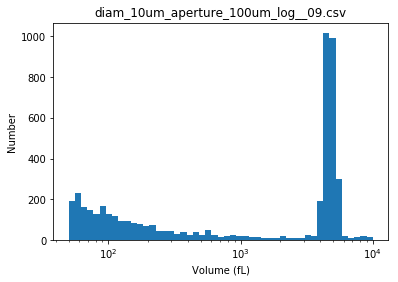

wrote 6197 items to diam_10um_aperture_100um_log__09_debinned.csv


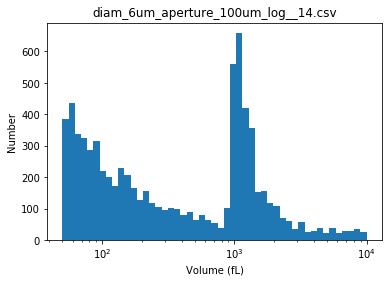

wrote 10027 items to diam_6um_aperture_100um_log__14_debinned.csv


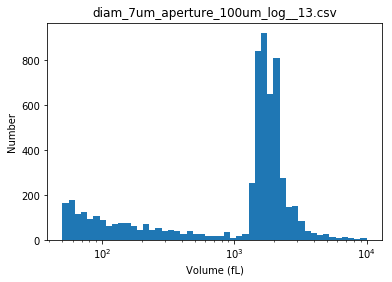

wrote 7183 items to diam_7um_aperture_100um_log__13_debinned.csv


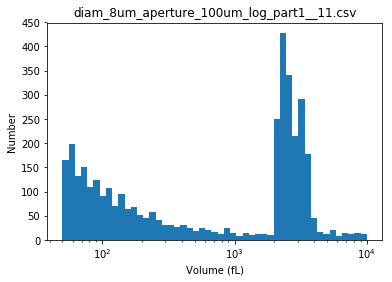

wrote 4807 items to diam_8um_aperture_100um_log_part1__11_debinned.csv


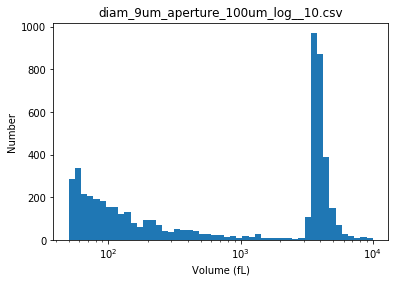

wrote 7216 items to diam_9um_aperture_100um_log__10_debinned.csv


In [2]:
INPUT_FOLDER = "raw/20190108_polystyrene_bead_ladder"
OUTPUT_FOLDER = "data"

convert_m4_files_to_csv(folder = INPUT_FOLDER)

for file in list_csv_files(folder = INPUT_FOLDER):
    debin_coulter_data(input_folder = INPUT_FOLDER,
                       output_folder = OUTPUT_FOLDER,
                       input_filename = file,
                       generate_plot = True)
